<a href="https://colab.research.google.com/github/Dfiora/Dfiora/blob/main/2024_12_11_PVS_An%C3%A1lises2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = '2024-12-11 - P14 Duas Séries.xlsx'
data = pd.read_excel(file_path)

# Exibir as primeiras linhas do dataframe
print(data.head())

# Renomear colunas para facilitar o acesso
data.columns = ['Date', 'Brazil_Prices', 'International_Index']

# Converter a coluna 'Date' para o formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir 'Date' como índice
data.set_index('Date', inplace=True)

# Plotar os dados das séries temporais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Brazil Prices')
plt.plot(data['International_Index'], label='International Index')
plt.legend()
plt.title('Time Series Data')
plt.show()

# Verificar estacionariedade usando o teste de Dickey-Fuller Aumentado
adf_brazil = sm.tsa.adfuller(data['Brazil_Prices'])
adf_international = sm.tsa.adfuller(data['International_Index'])

print('ADF Statistic for Brazil Prices:', adf_brazil[0])
print('p-value for Brazil Prices:', adf_brazil[1])
print('ADF Statistic for International Index:', adf_international[0])
print('p-value for International Index:', adf_international[1])

# Diferenciação para tornar as séries estacionárias, se necessário
data_diff = data.diff().dropna()

# Verificar estacionariedade novamente após a diferenciação
adf_brazil_diff = sm.tsa.adfuller(data_diff['Brazil_Prices'])
adf_international_diff = sm.tsa.adfuller(data_diff['International_Index'])

print('ADF Statistic for Differenced Brazil Prices:', adf_brazil_diff[0])
print('p-value for Differenced Brazil Prices:', adf_brazil_diff[1])
print('ADF Statistic for Differenced International Index:', adf_international_diff[0])
print('p-value for Differenced International Index:', adf_international_diff[1])

# Ajustar um modelo de Regressão Vetorial (VAR)
model = sm.tsa.VAR(data_diff)
results = model.fit(maxlags=15, ic='aic')

# Imprimir o sumário do modelo
print(results.summary())

# Usar o modelo para aproximar os preços brasileiros usando o índice internacional
approximation = results.fittedvalues['Brazil_Prices'] + data['Brazil_Prices'].shift(1).dropna()

# Plotar os valores aproximados em comparação com os valores reais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Actual Brazil Prices')
plt.plot(approximation, label='Approximated Brazil Prices', linestyle='--')
plt.legend()
plt.title('Approximated vs Actual Brazil Prices')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2024-12-11 - P14 Duas Séries.xlsx'

        Date  PSV Term Charter Rates, Brazil, 500-800m²  PSV Rate Index
0 1996-01-01                                 8094.97642        69.73707
1 1996-02-01                                 8726.53821        72.69132
2 1996-03-01                                 9358.10000        75.60865
3 1996-04-01                                 9291.17333        84.25671
4 1996-05-01                                 9224.24667        88.44680


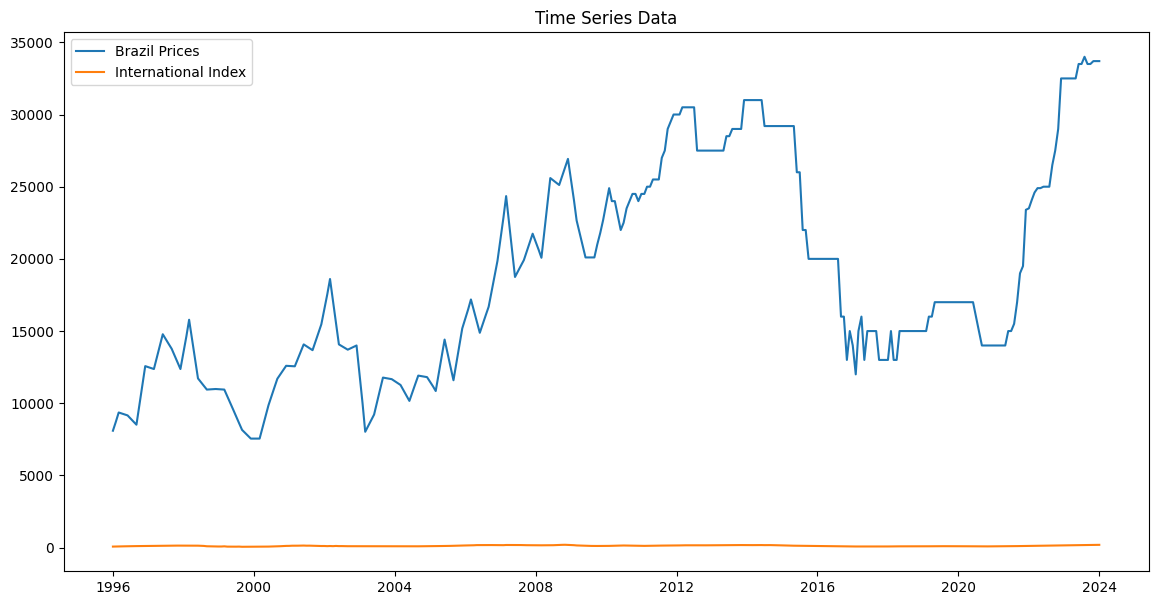

ADF Statistic for Brazil Prices: -1.4082154773743623
p-value for Brazil Prices: 0.5783312395360128
ADF Statistic for International Index: -2.1690789460762563
p-value for International Index: 0.21765876130198142
ADF Statistic for Differenced Brazil Prices: -3.839460476995217
p-value for Differenced Brazil Prices: 0.002528426843723853
ADF Statistic for Differenced International Index: -5.96630836912929
p-value for Differenced International Index: 1.9839813251646333e-07
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Dec, 2024
Time:                     16:01:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.6721
Nobs:                     330.000    HQIC:                   16.4921
Log likelihood:          -3612.00    FPE:                1.29012e+07
AIC:                      16.3728    Det(Omega_mle):     1.19418e+07
--------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


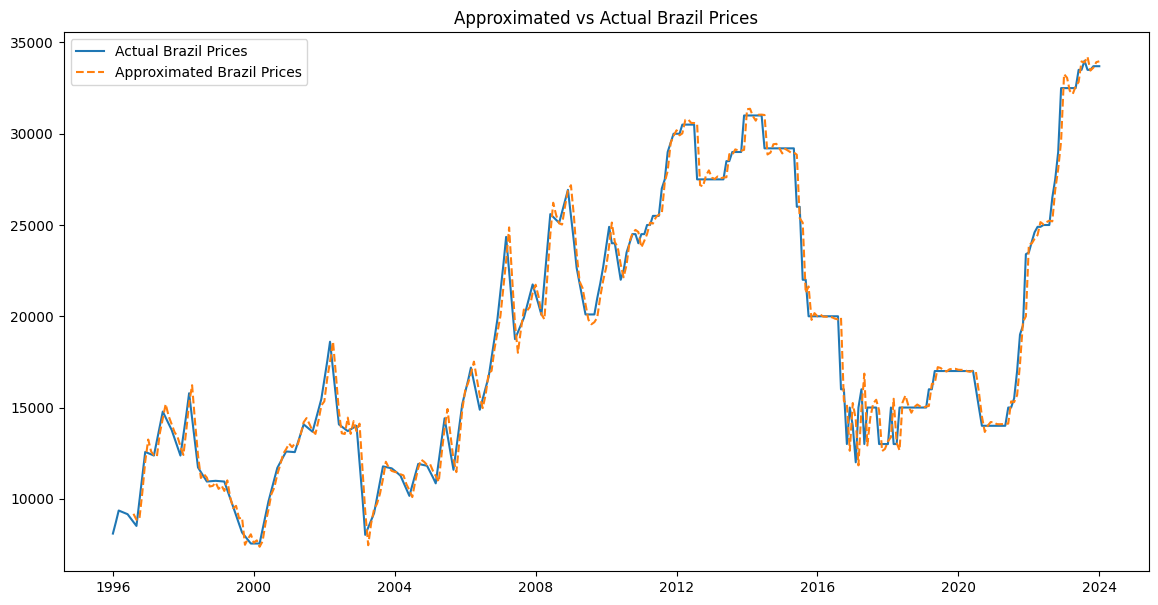

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = '2024-12-11 - P14 Duas Séries.xlsx'
data = pd.read_excel(file_path)

# Exibir as primeiras linhas do dataframe
print(data.head())

# Renomear colunas para facilitar o acesso
data.columns = ['Date', 'Brazil_Prices', 'International_Index']

# Converter a coluna 'Date' para o formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir 'Date' como índice
data.set_index('Date', inplace=True)

# Remover quaisquer valores ausentes
data = data.dropna()

# Plotar os dados das séries temporais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Brazil Prices')
plt.plot(data['International_Index'], label='International Index')
plt.legend()
plt.title('Time Series Data')
plt.show()

# Verificar estacionariedade usando o teste de Dickey-Fuller Aumentado
adf_brazil = sm.tsa.adfuller(data['Brazil_Prices'].dropna())
adf_international = sm.tsa.adfuller(data['International_Index'].dropna())

print('ADF Statistic for Brazil Prices:', adf_brazil[0])
print('p-value for Brazil Prices:', adf_brazil[1])
print('ADF Statistic for International Index:', adf_international[0])
print('p-value for International Index:', adf_international[1])

# Diferenciação para tornar as séries estacionárias
data_diff = data.diff().dropna()

# Verificar estacionariedade novamente após a diferenciação
adf_brazil_diff = sm.tsa.adfuller(data_diff['Brazil_Prices'].dropna())
adf_international_diff = sm.tsa.adfuller(data_diff['International_Index'].dropna())

print('ADF Statistic for Differenced Brazil Prices:', adf_brazil_diff[0])
print('p-value for Differenced Brazil Prices:', adf_brazil_diff[1])
print('ADF Statistic for Differenced International Index:', adf_international_diff[0])
print('p-value for Differenced International Index:', adf_international_diff[1])

# Ajustar um modelo de Regressão Vetorial (VAR)
model = sm.tsa.VAR(data_diff)
results = model.fit(maxlags=15, ic='aic')

# Imprimir o sumário do modelo
print(results.summary())

# Usar o modelo para aproximar os preços brasileiros usando o índice internacional
approximation = results.fittedvalues['Brazil_Prices'] + data['Brazil_Prices'].shift(1).dropna()

# Plotar os valores aproximados em comparação com os valores reais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Actual Brazil Prices')
plt.plot(approximation, label='Approximated Brazil Prices', linestyle='--')
plt.legend()
plt.title('Approximated vs Actual Brazil Prices')
plt.show()


        Date  PSV Term Charter Rates, Brazil, 500-800m²  PSV Rate Index
0 1996-01-01                                 8094.97642        69.73707
1 1996-02-01                                 8726.53821        72.69132
2 1996-03-01                                 9358.10000        75.60865
3 1996-04-01                                 9291.17333        84.25671
4 1996-05-01                                 9224.24667        88.44680


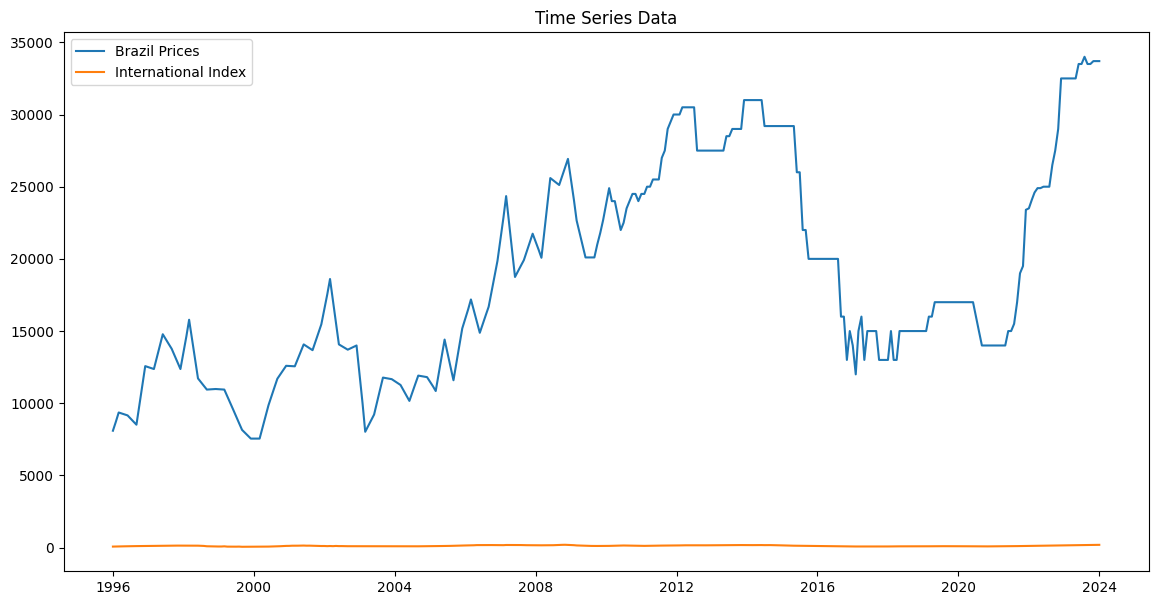

ADF Statistic for Brazil Prices: -1.4082154773743623
p-value for Brazil Prices: 0.5783312395360128
ADF Statistic for International Index: -2.1690789460762563
p-value for International Index: 0.21765876130198142
ADF Statistic for Differenced Brazil Prices: -3.839460476995217
p-value for Differenced Brazil Prices: 0.002528426843723853
ADF Statistic for Differenced International Index: -5.96630836912929
p-value for Differenced International Index: 1.9839813251646333e-07
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Dec, 2024
Time:                     16:01:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.6721
Nobs:                     330.000    HQIC:                   16.4921
Log likelihood:          -3612.00    FPE:                1.29012e+07
AIC:                      16.3728    Det(Omega_mle):     1.19418e+07
--------

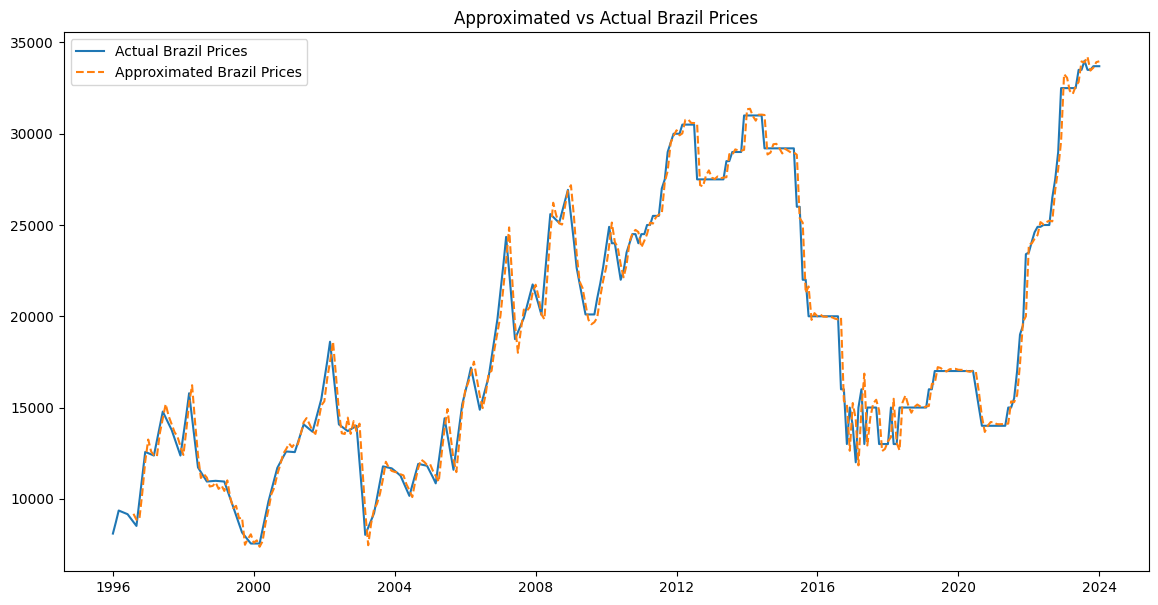

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = '2024-12-11 - P14 Duas Séries.xlsx'
data = pd.read_excel(file_path)

# Exibir as primeiras linhas do dataframe
print(data.head())

# Renomear colunas para facilitar o acesso
data.columns = ['Date', 'Brazil_Prices', 'International_Index']


# Converter a coluna 'Date' para o formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir 'Date' como índice e definir a frequência como mensal
data.set_index('Date', inplace=True)
data = data.asfreq('MS')

# Remover quaisquer valores ausentes
data = data.dropna()

# Plotar os dados das séries temporais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Brazil Prices')
plt.plot(data['International_Index'], label='International Index')
plt.legend()
plt.title('Time Series Data')
plt.show()

# Verificar estacionariedade usando o teste de Dickey-Fuller Aumentado
adf_brazil = sm.tsa.adfuller(data['Brazil_Prices'])
adf_international = sm.tsa.adfuller(data['International_Index'])

print('ADF Statistic for Brazil Prices:', adf_brazil[0])
print('p-value for Brazil Prices:', adf_brazil[1])
print('ADF Statistic for International Index:', adf_international[0])
print('p-value for International Index:', adf_international[1])

# Diferenciação para tornar as séries estacionárias, se necessário
data_diff = data.diff().dropna()

# Verificar estacionariedade novamente após a diferenciação
adf_brazil_diff = sm.tsa.adfuller(data_diff['Brazil_Prices'])
adf_international_diff = sm.tsa.adfuller(data_diff['International_Index'])

print('ADF Statistic for Differenced Brazil Prices:', adf_brazil_diff[0])
print('p-value for Differenced Brazil Prices:', adf_brazil_diff[1])
print('ADF Statistic for Differenced International Index:', adf_international_diff[0])
print('p-value for Differenced International Index:', adf_international_diff[1])

# Ajustar um modelo de Regressão Vetorial (VAR)
model = sm.tsa.VAR(data_diff)
results = model.fit(maxlags=15, ic='aic')

# Imprimir o sumário do modelo
print(results.summary())

# Usar o modelo para aproximar os preços brasileiros usando o índice internacional
approximation = results.fittedvalues['Brazil_Prices'] + data['Brazil_Prices'].shift(1).dropna()

# Plotar os valores aproximados em comparação com os valores reais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Actual Brazil Prices')
plt.plot(approximation, label='Approximated Brazil Prices', linestyle='--')
plt.legend()
plt.title('Approximated vs Actual Brazil Prices')
plt.show()


Mean MSE from cross-validation: 961652.6762564257


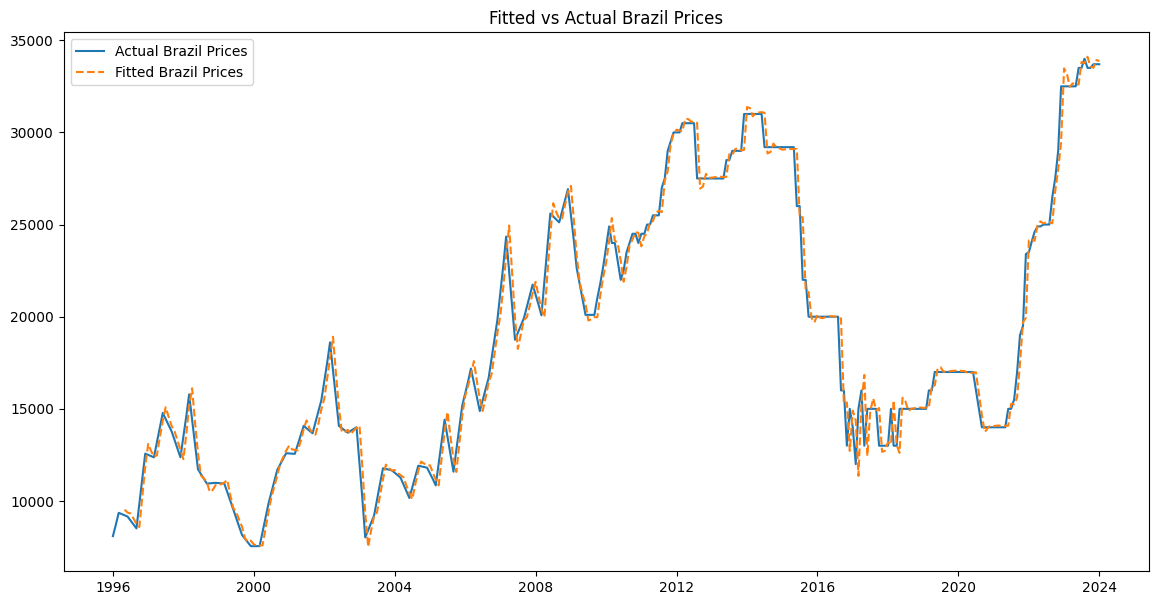

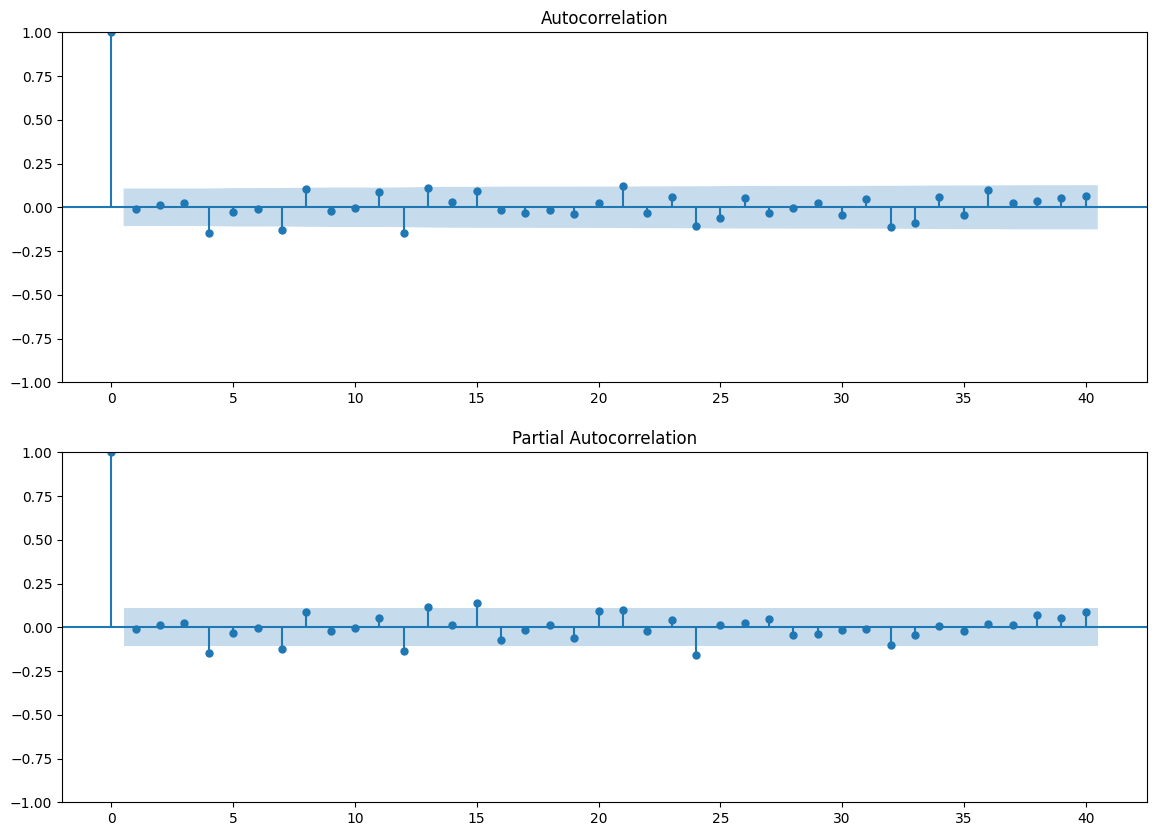

      lb_stat  lb_pvalue
10  17.490625   0.064188


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Carregar os dados do arquivo Excel
file_path = '2024-12-11 - P14 Duas Séries.xlsx'
data = pd.read_excel(file_path)

# Renomear colunas para facilitar o acesso
data.columns = ['Date', 'Brazil_Prices', 'International_Index']


# Converter a coluna 'Date' para o formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir 'Date' como índice e definir a frequência como mensal
data.set_index('Date', inplace=True)
data = data.asfreq('MS')

# Remover quaisquer valores ausentes
data = data.dropna()

# Diferenciação para tornar as séries estacionárias, se necessário
data_diff = data.diff().dropna()

# Função para ajustar e prever usando o modelo VAR
def fit_predict_VAR(train, test):
    model = sm.tsa.VAR(train)
    results = model.fit(maxlags=3, ic='aic')
    lag_order = results.k_ar
    forecast_input = train.values[-lag_order:]
    forecast = results.forecast(y=forecast_input, steps=len(test))
    return forecast

# Validação cruzada com séries temporais
tscv = TimeSeriesSplit(n_splits=5)
mse_list = []

for train_index, test_index in tscv.split(data_diff):
    train, test = data_diff.iloc[train_index], data_diff.iloc[test_index]
    forecast = fit_predict_VAR(train, test)
    mse = mean_squared_error(test['Brazil_Prices'], forecast[:, 0])
    mse_list.append(mse)

# Média do erro quadrático médio (MSE) nas dobras de validação cruzada
mean_mse = sum(mse_list) / len(mse_list)
print(f'Mean MSE from cross-validation: {mean_mse}')

# Ajustar o modelo VAR nos dados completos e prever os valores ajustados
model_full = sm.tsa.VAR(data_diff)
results_full = model_full.fit(maxlags=3, ic='aic')
fitted_values = results_full.fittedvalues['Brazil_Prices'] + data['Brazil_Prices'].shift(1).dropna()

# Plotar os valores ajustados em comparação com os valores reais
plt.figure(figsize=(14, 7))
plt.plot(data['Brazil_Prices'], label='Actual Brazil Prices')
plt.plot(fitted_values, label='Fitted Brazil Prices', linestyle='--')
plt.legend()
plt.title('Fitted vs Actual Brazil Prices')
plt.show()

# Verificar a autocorrelação dos resíduos do modelo VAR completo
residuals_full = results_full.resid

fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sm.graphics.tsa.plot_acf(residuals_full['Brazil_Prices'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals_full['Brazil_Prices'], lags=40, ax=ax[1])
plt.show()

# Realizar o teste de Ljung-Box nos resíduos para verificar a autocorrelação
ljung_box_test_full = sm.stats.acorr_ljungbox(residuals_full['Brazil_Prices'], lags=[10], return_df=True)
print(ljung_box_test_full)


Avaliando a correlação cruzada e a causalidade de Granger

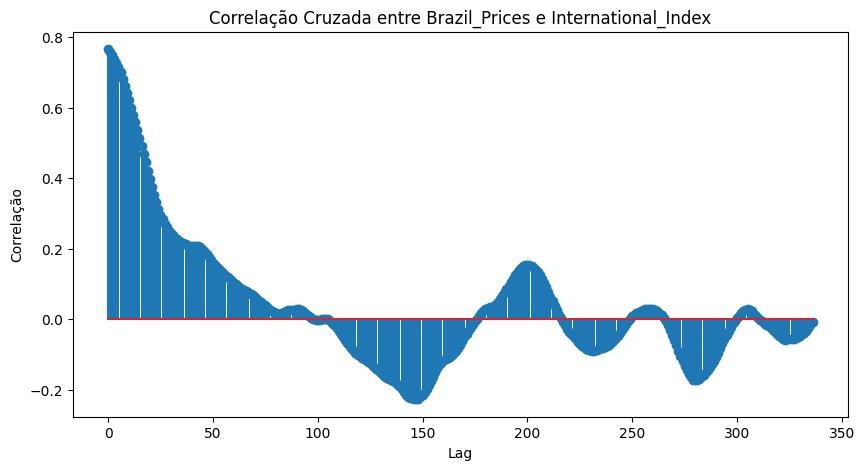

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcular a correlação cruzada
cross_corr = sm.tsa.stattools.ccf(data['Brazil_Prices'], data['International_Index'], adjusted=False)

# Plotar a correlação cruzada
plt.figure(figsize=(10, 5))
plt.stem(cross_corr)
plt.title('Correlação Cruzada entre Brazil_Prices e International_Index')
plt.xlabel('Lag')
plt.ylabel('Correlação')
plt.show()

In [ ]:
model = sm.tsa.VAR(data_diff)  # data_diff é a série diferenciada.
results = model.fit(maxlags=15, ic='aic')
granger_test_result = results.test_causality('Brazil_Prices', 'International_Index', kind='f')
print(granger_test_result)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: International_Index does not Granger-cause Brazil_Prices: fail to reject at 5% significance level. Test statistic: 1.926, critical value: 2.113>, p-value: 0.074>
